In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske


c:\users\mai\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
titanic= pd.read_csv("E:/FCI/year 4/second term/NN/labs/neural-network-and-deep-learning-master/lab3/titanic_data.csv")

In [3]:
print(titanic.head());

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


               PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633  


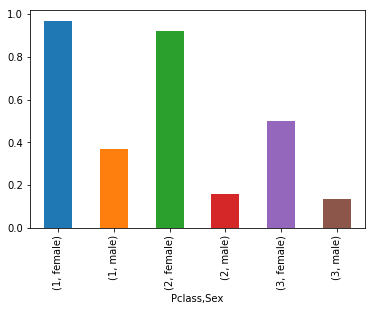

In [4]:
sex_grouping = titanic.groupby(['Pclass','Sex']).mean()
print(sex_grouping)
sex_grouping['Survived'].plot.bar()

In [5]:
titanic=titanic.drop(['Name','Embarked','Ticket','Cabin','PassengerId'],axis=1)
print(titanic.head());

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


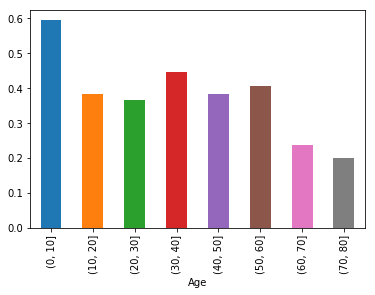

In [6]:
group_by_age = pd.cut(titanic["Age"], np.arange(0, 90, 10))
age_grouping = titanic.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()


0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      3
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     4
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     3
25     1
26     0
27     3
28     0
29     0
      ..
861    1
862    0
863    8
864    0
865    0
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64


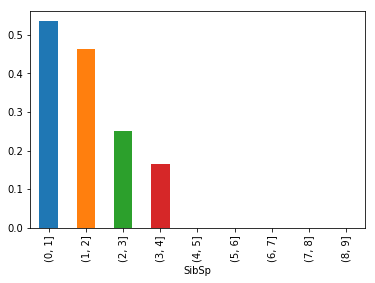

In [7]:
print(titanic.SibSp)
group_by_sib = pd.cut(titanic["SibSp"], np.arange(0, 10, 1))
sib_grouping = titanic.groupby(group_by_sib).mean()
sib_grouping['Survived'].plot.bar()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      2
9      0
10     1
11     0
12     0
13     5
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     5
26     0
27     2
28     0
29     0
      ..
861    0
862    0
863    2
864    0
865    0
866    0
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    0
875    0
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    5
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64


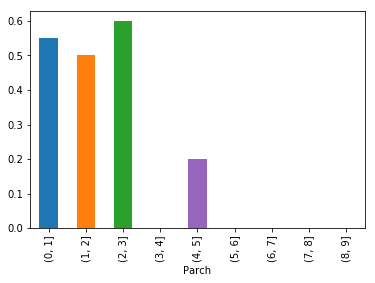

In [8]:
print(titanic.Parch)
group_by_parch = pd.cut(titanic["Parch"], np.arange(0, 10, 1))
parch_grouping = titanic.groupby(group_by_parch).mean()
parch_grouping['Survived'].plot.bar()

In [9]:
titanic[ "Age" ] = titanic.Age.fillna( titanic.Age.mean())
titanic.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
dtype: int64

In [10]:
def preprocessing(df):
    processed_df = df.copy()
    pd.Series(processed_df.Sex).astype('category').cat.codes.values
    processed_df.Sex =pd.Series(processed_df.Sex).astype('category').cat.codes.values 
    return processed_df

In [11]:
processed_df = preprocessing(titanic)
print(processed_df.Sex)
print(titanic.Sex)

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int8
0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       

In [12]:
def splitDataSet(df):
    X = processed_df.drop(['Survived'], axis=1).values
    Y = processed_df['Survived'].values
    train_set_x_orig,test_set_x_orig ,train_set_y_orig,  test_set_y_orig = cross_validation.train_test_split(X,Y,test_size=0.2)
    print("train set x dim= "+str(train_set_x_orig.shape))
    print("train set y dim= "+str(train_set_y_orig.shape))
    print("test set x dim= "+str(test_set_x_orig.shape))
    print("test set y dim= "+str(test_set_y_orig.shape))
    print("after transpose ...")
    print("train set x dim= "+str(train_set_x_orig.T.shape))
    print("train set y dim= "+str(train_set_y_orig.shape))
    print("test set x dim= "+str(test_set_x_orig.T.shape))
    print("test set y dim= "+str(test_set_y_orig.shape))
    return train_set_x_orig.T,test_set_x_orig.T ,train_set_y_orig,  test_set_y_orig

In [13]:
train_set_x, test_set_x, train_set_y, test_set_y = splitDataSet(titanic)

train set x dim= (712, 6)
train set y dim= (712,)
test set x dim= (179, 6)
test set y dim= (179,)
after transpose ...
train set x dim= (6, 712)
train set y dim= (712,)
test set x dim= (6, 179)
test set y dim= (179,)


In [14]:
def sigmoid(input):
    """
    Compute the sigmoid of input

    Arguments:
    input -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(input)
    """

    s = 1/(1 + np.exp(-input))
    
    return s

In [15]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- number of parameters 
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0.0
    
    return w, b

In [16]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient 

    Arguments:
    w -- weights, a numpy array of size (num_Critirea, 1)
    b -- bias, a scalar
    X -- data of size (num_Critirea, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION 

    A = sigmoid(np.dot(w.T, X) + b) 
    print(Y.shape)
    
    
    # compute activation
    cost = - 1/m * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)))          # compute cost
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    
    dw =  1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A-Y)
    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [17]:
#optimize FUNCTION

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_criterea, 1)
    b -- bias, a scalar
    X -- data of shape (num_criterea, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Notes:
    there are two steps to iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        #updates
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [18]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_Criterea, 1)
    b -- bias, a scalar
    X -- data of size (num_Criterea, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    
    ### make prediction
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    
    return Y_prediction

In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_Criterea, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_Criterea, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    #initialize
    w, b = initialize_with_zeros(X_train.shape[0])  # where to get dimension?

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [20]:
print(train_set_y.shape)
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(712,)
(712,)
Cost after iteration 0: 0.693147
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
Cost after iteration 100: 0.709375
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(

(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
Cost after iteration 1200: 0.618566
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
Cost after iteration 1300: 0.614026
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712,)
(712

In [21]:
# Pclass Sex  Age  SibSp  Parch Fare
test_EX=np.array([[3,1,21,2,1,21]],float)
result = predict(d["w"], d["b"], test_EX.T)
if result ==1:
   print("survived")
else:
   print("not survived")

not survived


In [22]:
test_EX=np.array([[1,0,21,1,0,71]],float)
result = predict(d["w"], d["b"], test_EX.T)
if result ==1:
   print("survived")
else:
   print("not survived")

survived
